Artificial Neural Network (ANN) for Classification
We are gonna use the Iris dataset, which is commonly used for multi-class classification tasks. The dataset includes 150 samples of iris plants divided into 3 species, with 4 features each: sepal length, sepal width, petal length, and petal width.

Steps:
*   Data Loading and Preprocessing: We load the Iris dataset, and apply one-hot encoding to the target variable to transform it into a format suitable for multi-class classification.
*   Model Building: The model has two hidden layers with 10 neurons each. The 'relu' activation function helps the model learn non-linear relationships. The output layer uses 'softmax' to output probabilities for the three classes.
*   Model Compilation: We compile the model using 'adam' optimizer (a robust, adaptive learning rate optimizer) and 'categorical_crossentropy' for multi-class classification loss.
*   Model Training: We train the model while also validating it on a separate test set. This helps monitor the model's performance and prevent overfitting.
*   Visualization: After training, we visualize the training and validation accuracy and loss to check how well the model learned and how it performs on unseen data.







In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [8]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)  # Reshape target to fit encoder

In [10]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [19]:
# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)
y_encoded[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [20]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [27]:
# Define the model structure
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Input layer: 4 features, hidden layer with 10 neurons
    Dense(10, activation='relu'),  # Another hidden layer with 10 neurons
    Dense(3, activation='softmax')  # Output layer with 3 neurons, one for each class
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.2)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3728 - loss: 1.2348 - val_accuracy: 0.2917 - val_loss: 1.1349
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3668 - loss: 1.1272 - val_accuracy: 0.6250 - val_loss: 1.0373
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5368 - loss: 1.0775 - val_accuracy: 0.7083 - val_loss: 1.0199
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6273 - loss: 1.0405 - val_accuracy: 0.7083 - val_loss: 1.0063
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6659 - loss: 1.0377 - val_accuracy: 0.7083 - val_loss: 0.9979
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6429 - loss: 1.0208 - val_accuracy: 0.7083 - val_loss: 0.9772
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6617 - loss: 1.0042 - val_accuracy: 0.7083 - val_loss: 0.9562
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7033 - loss: 0.9673 - val_accuracy: 0.7083 - val_loss

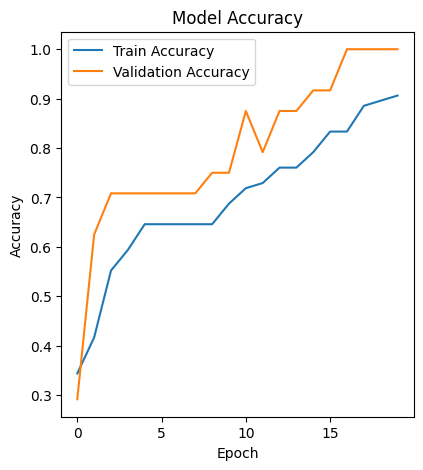

In [28]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

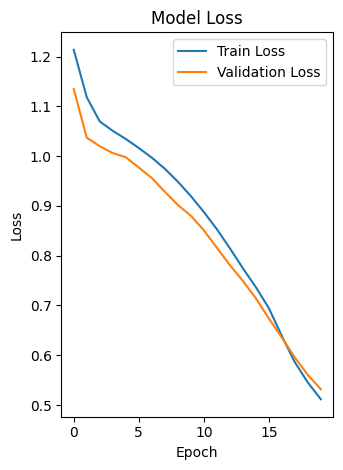

In [29]:
# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9000 - loss: 0.4687
Test accuracy: 0.90
